# Telco Customer Churn Analysis

### Description
    Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs

#### Step 1.Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)


#### Step 2.Import the dataset

In [2]:
df = pd.read_csv(r"C:\Users\prade\OneDrive\Desktop\Telco Customer Churn Analyse\Dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Step 3.Understand and Analyse the datasets

In [4]:
df.shape

(7043, 21)

##### 3.1 Verify the presence of Null values and duplicated entries

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

##### 3.2 Analyse the Column Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### 3.3 Descriptive Analytics

In [9]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


#### Step 4.Preprocessing

##### 4.1 Remove Identifier to reduce the noice

In [10]:
df.drop('customerID', axis=1, inplace=True)

##### 4.2 Encoding

In [11]:
cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

### 5. EDA (Exploratory Data Analysis)

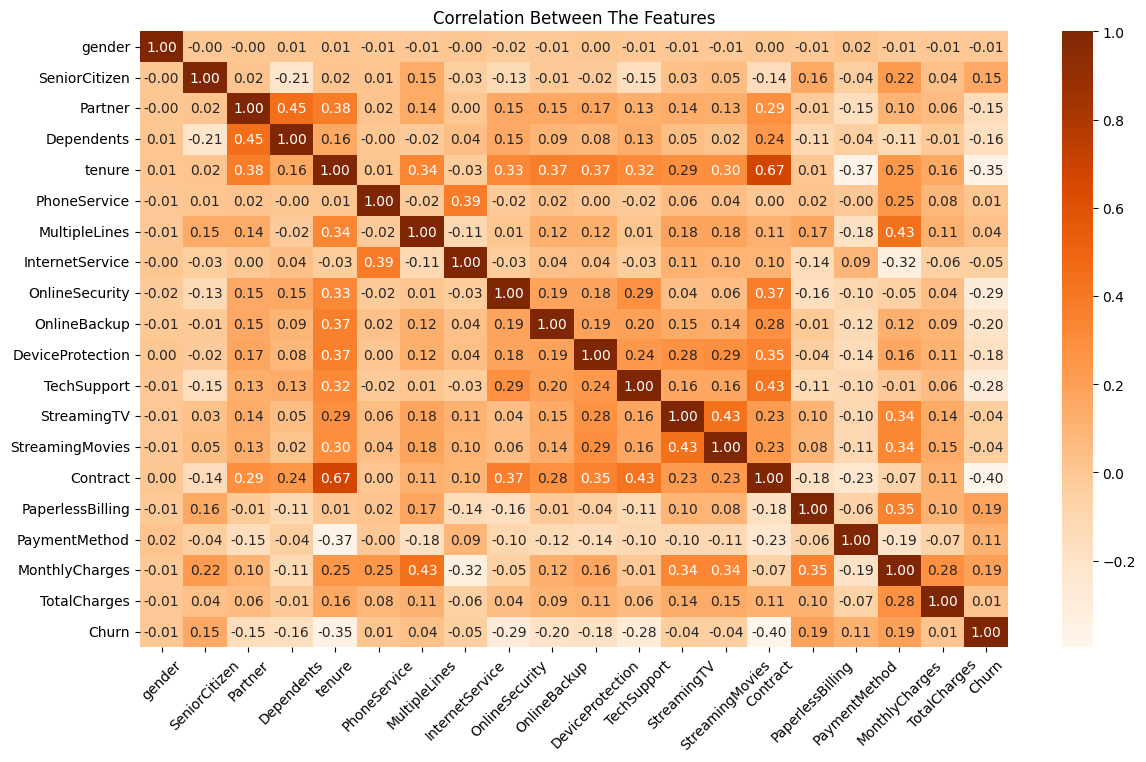

In [12]:
corr = df.corr()

plt.figure(figsize=(14,8))
sns.heatmap(corr, cmap='Oranges', annot=True, fmt='.2f')
plt.title('Correlation Between The Features')
plt.xticks(rotation=45)
plt.show()

In [13]:
features = df.columns.tolist()
features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

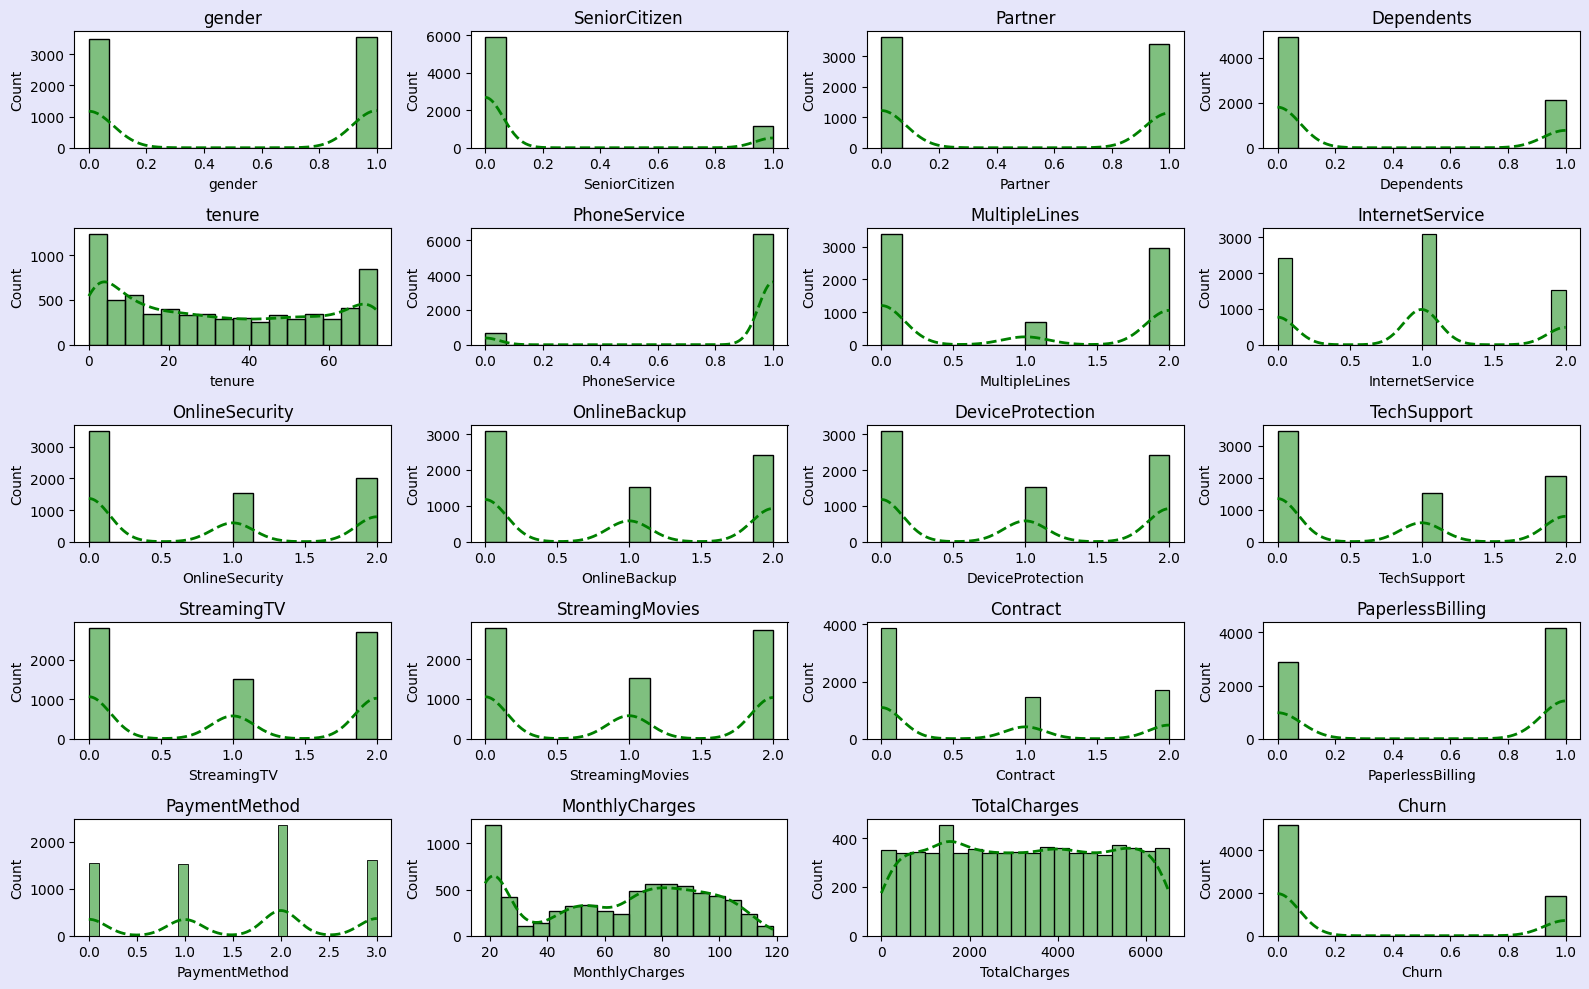

In [14]:
rows = 5
columns = 4

plt.figure(figsize=(16,10))

for i,f in enumerate(features,1):
    plt.subplot(rows, columns, i)
    sns.histplot(df[f], color='green', kde=True,line_kws={"linewidth": 2, "linestyle": "--"})
    plt.title(f)
plt.gcf().set_facecolor('lavender')
plt.tight_layout()
plt.show()

##### Verify the Outliers

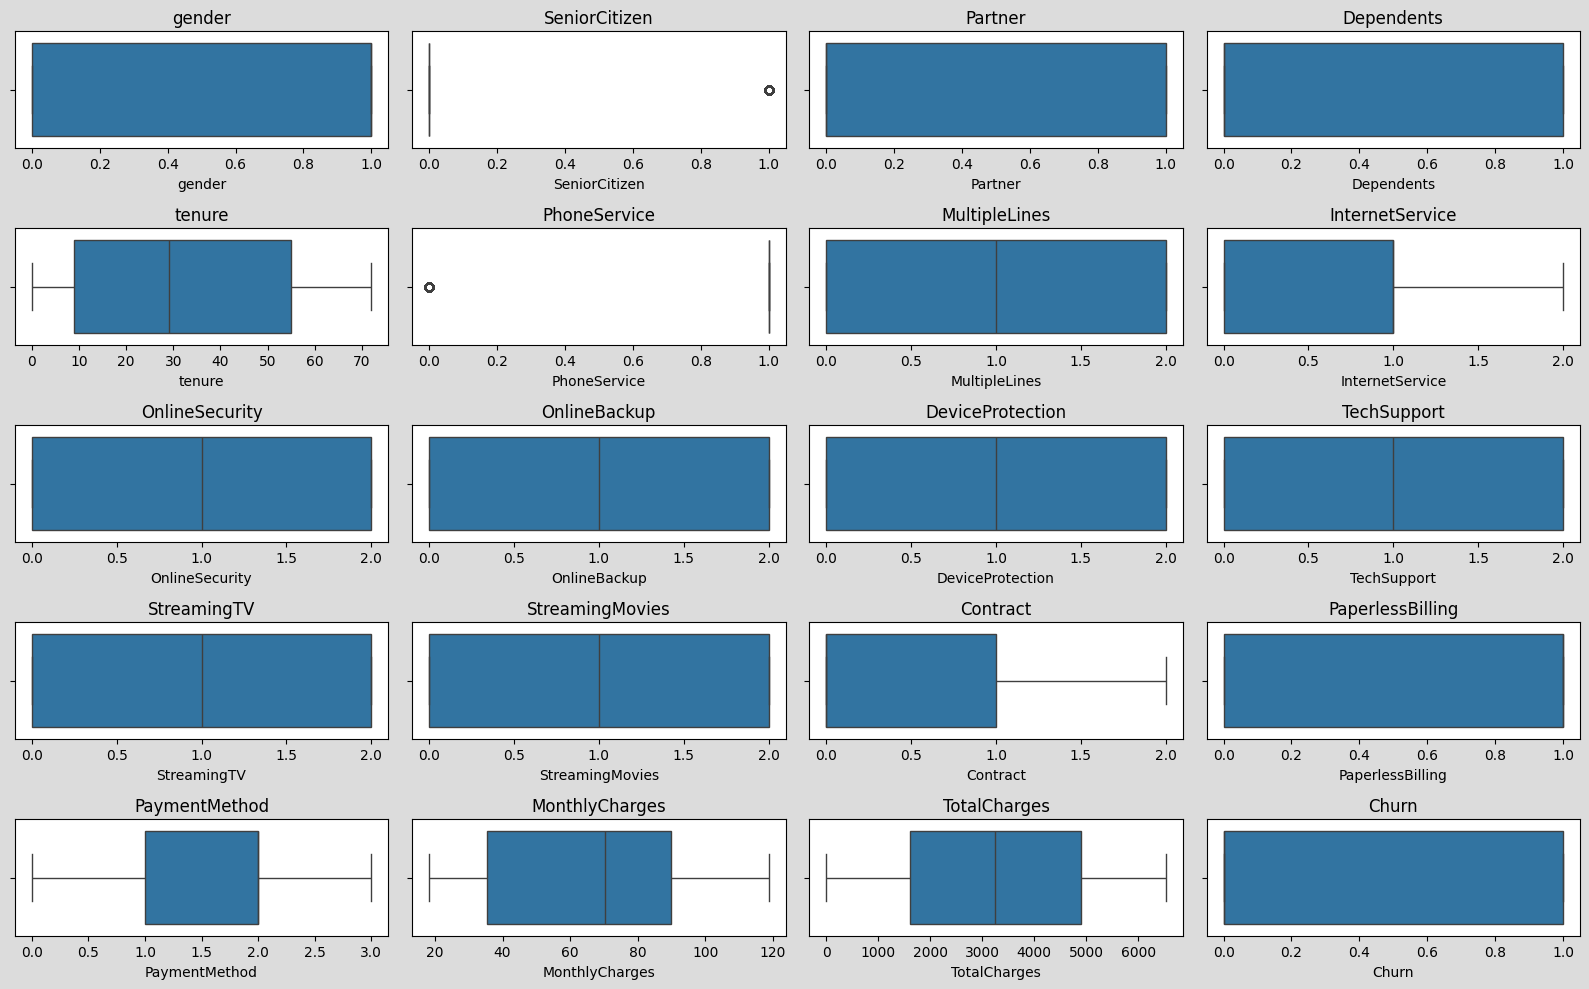

In [15]:
plt.figure(figsize=(16,10))

for i,f in enumerate(features,1):
    plt.subplot(rows, columns, i)
    sns.boxplot(x=df[f])
    plt.title(f)
plt.gcf().set_facecolor('gainsboro')
plt.tight_layout()
plt.show()

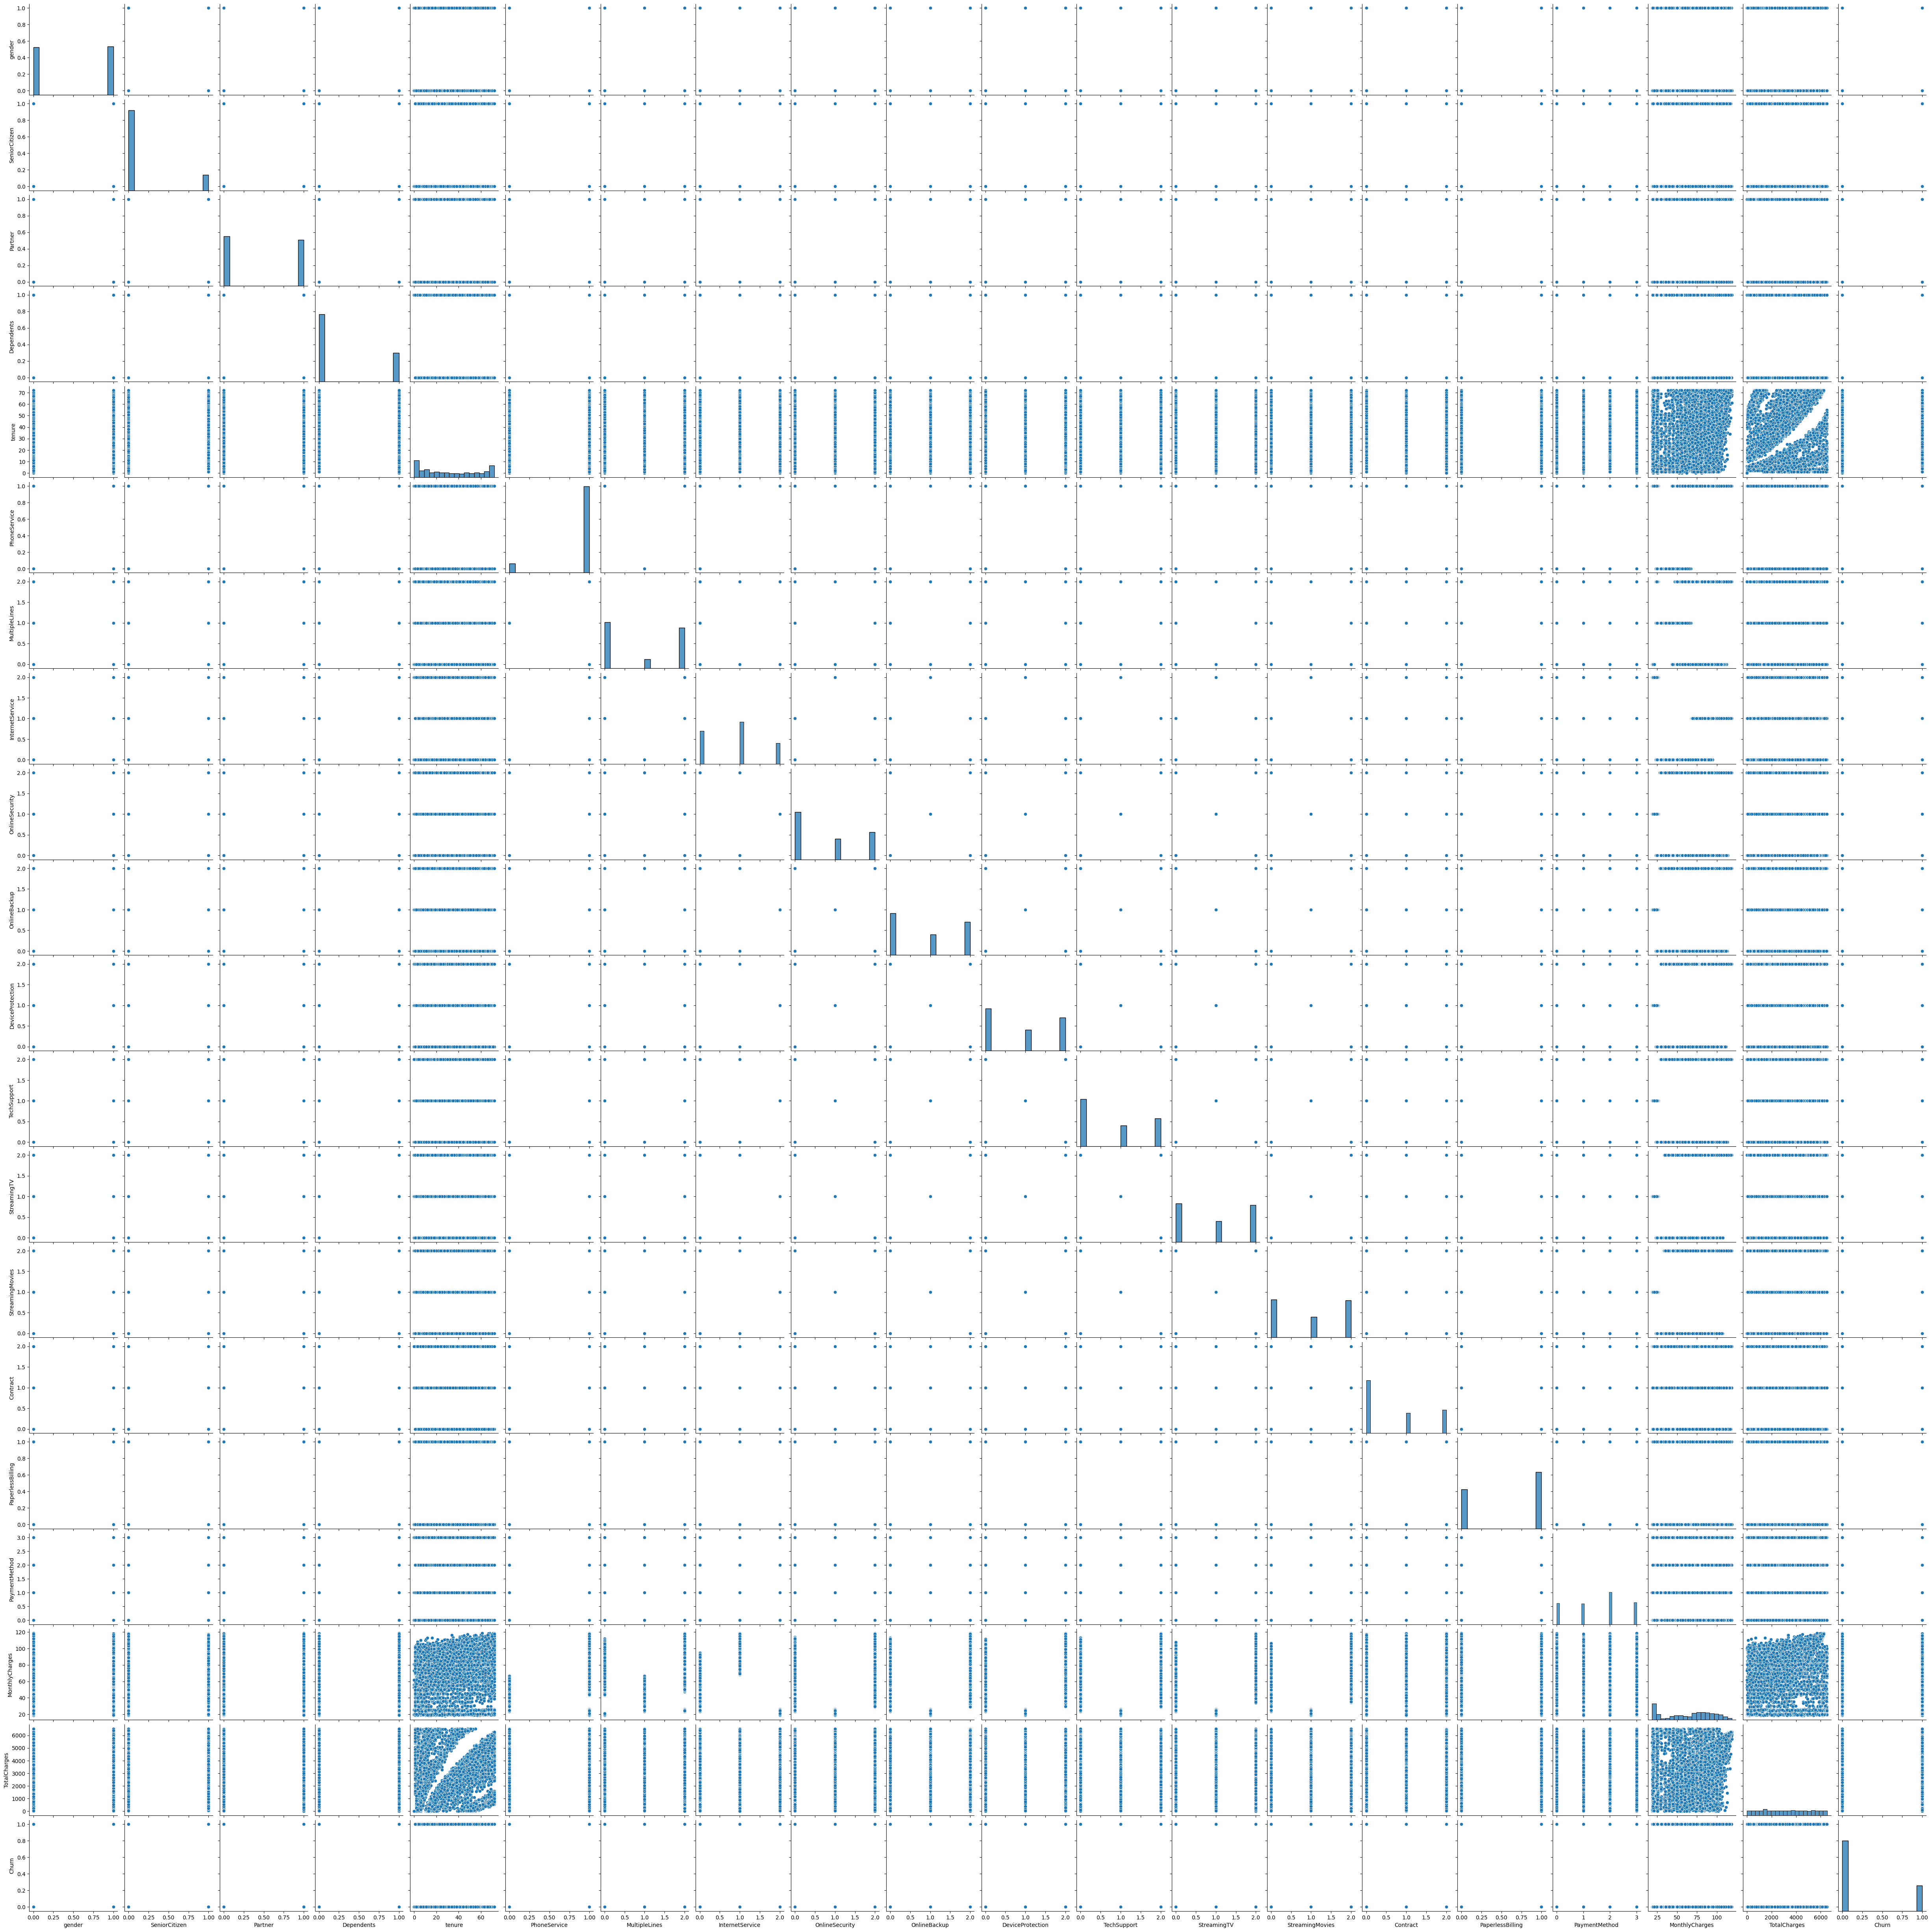

In [16]:
sns.pairplot(df)
plt.show()

#### Step 6.Split the data into Input Features and Target Variables

In [17]:
X = df.drop('Churn', axis=1)
y = df['Churn']

#### Step 6.Separate Input Features and Target Values for trainig and testing

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

#### Step 7.Feature Scaling

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Step 8.Model Selection

In [20]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [21]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

#### Step 9.Evaluation Metrics

In [22]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [23]:
print("\nMODEL PERFORMANCE")
print(f"Accuracy  : {accuracy*100:.2f}%")
print(f"Precision : {precision*100:.2f}%")
print(f"Recall    : {recall*100:.2f}%")
print(f"F1 Score  : {f1*100:.2f}%")


MODEL PERFORMANCE
Accuracy  : 75.16%
Precision : 51.95%
Recall    : 82.31%
F1 Score  : 63.69%


##### Confusion Matrix

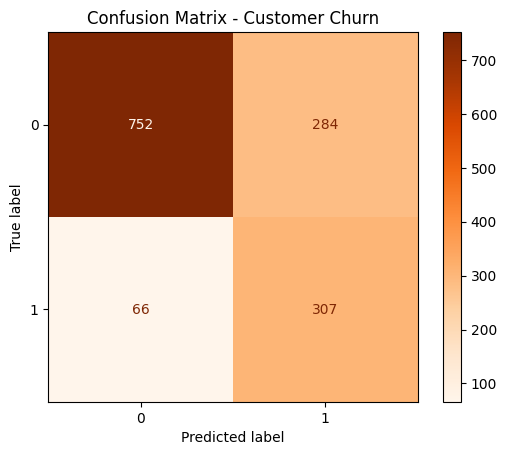

In [24]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix - Customer Churn")
plt.show()

##### ROC Curve + AUC

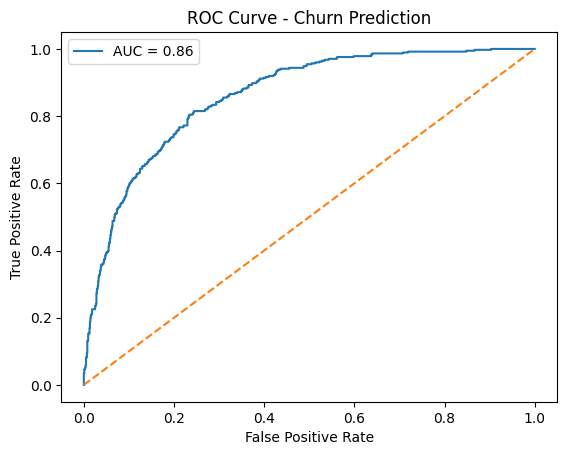

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Churn Prediction")
plt.legend()
plt.show()

#### Step 10.Threshold Tuning (Business Focus)

In [26]:
custom_threshold = 0.4
y_custom = (y_prob >= custom_threshold).astype(int)

print("\nTHRESHOLD = 0.4 PERFORMANCE")
print("Precision:", precision_score(y_test, y_custom))
print("Recall   :", recall_score(y_test, y_custom))
print("F1 Score :", f1_score(y_test, y_custom))


THRESHOLD = 0.4 PERFORMANCE
Precision: 0.47338129496402875
Recall   : 0.8820375335120644
F1 Score : 0.6161048689138576


#### Step 11.Feature Importance

In [27]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nTOP FEATURES IMPACTING CHURN")
print(feature_importance.head(10))


TOP FEATURES IMPACTING CHURN
             Feature  Coefficient
17    MonthlyCharges     0.806699
7    InternetService     0.171521
15  PaperlessBilling     0.162650
18      TotalCharges     0.094438
16     PaymentMethod     0.068579
1      SeniorCitizen     0.063563
6      MultipleLines     0.061695
13   StreamingMovies     0.046649
2            Partner     0.022849
12       StreamingTV     0.002148


#### Step 12.Export for Power BI

In [28]:
output = pd.DataFrame(X_test, columns=X.columns)
output['Actual_Churn'] = y_test.values
output['Predicted_Churn'] = y_pred
output['Churn_Probability'] = y_prob

output.to_csv("churn_prediction_outputs.csv", index=False)

#### Step 13.Overall Insight